# 一、环境准备

pip install requirements.txt

In [106]:
import requests
import json
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
# 设置中文字体，'SimHei'是宋体字体的一种，根据需要选择合适的字体
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'

# 用于正常显示负号
plt.rcParams['axes.unicode_minus'] = False

# 二、爬虫获取破局星球精华文章

In [9]:
from urllib.parse import quote
import time
import random
from fake_useragent import UserAgent
import requests


def get_data(url):
    ua = UserAgent()
    user_agent = ua.random
    headers_group = {
        "accept": "application/json, text/plain, */*",
        "accept-encoding": "gzip, deflate, br",
        "accept-language": "zh-CN,zh;q=0.9",
        "cache-control": "no-cache",
        "cookie": "UM_distinctid=188126c9de5337-07a7abb9fd0331-1b525635-13c680-188126c9de61027; _ga=GA1.1.1002968551.1693924669; _ga_GDWQY4XZV0=GS1.1.1696917573.19.0.1696917573.0.0.0; zsxq_access_token=1549B62D-EC34-C9D1-18C4-9F0122DA1AD2_D1C6A4222B5F9CAF; sensorsdata2015jssdkcross=%7B%22distinct_id%22%3A%22225444245111%22%2C%22first_id%22%3A%2218824493cfa898-0c30cc82c2f499-1b525635-1296000-18824493cfb153a%22%2C%22props%22%3A%7B%22%24latest_traffic_source_type%22%3A%22%E5%BC%95%E8%8D%90%E6%B5%81%E9%87%8F%22%2C%22%24latest_search_keyword%22%3A%22%E6%9C%AA%E5%8F%96%E5%88%B0%E5%80%BC%22%2C%22%24latest_referrer%22%3A%22https%3A%2F%2Fxiaobot.net%2F%22%7D%2C%22%24device_id%22%3A%2218824493cfa898-0c30cc82c2f499-1b525635-1296000-18824493cfb153a%22%2C%22identities%22%3A%22eyIkaWRlbnRpdHlfy29va2llX2lkIjoiMTg4Mjk5NDAwMWE1MzJkOTktMWE3Zi05MTFmMmFhNjM3Y2FkLTIyNTQ0NDI0NTE1MTEtMTExIn0=%22%2C%22history_login_id%22%3A%7B%22name%22%3A%22%24identity_login_id%22%2C%22value%22%3A%22225444245111%22%7D%7D; abtest_env=product; zsxqsessionid=6fa9c7672e24dc2fada79e453adc229b; __cuid=00bdeb1fab624f0bbe899542d7d07fda; amp_fef1e8=169da19e-4836-4e96-9ee7-94eeabc53f18R...1he0d9b46.1he0d9b49.2.2.4",
        "dnt": "1",
        "origin": "https://wx.zsxq.com",
        "pragma": "no-cache",
        "referer": "https://wx.zsxq.com/",
        "sec-ch-ua": '"Chromium";v="104", " Not A;Brand";v="99", "Google Chrome";v="104"',
        "sec-ch-ua-mobile": "?0",
        "sec-ch-ua-platform": "macOS",
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "same-site",
        "user-agent":  user_agent,
        "x-request-id": "820c80e29-2bf0-4d33-fb8d-3dc621004ad",
        "x-signature": "53998a061597cf1c91e06bd3a2f6fa7935ad2d73",
        "x-timestamp": "1698673871",
        "x-version": "2.45.0",
    }
    max_retries = 5
    for _ in range(max_retries):
        rsp = requests.get(url, headers=headers_group)
        print(url, rsp.status_code, user_agent)
        if rsp.status_code == 200:
            return rsp.json().get('resp_data').get('topics')
        time.sleep(5)  # 例如，等待5秒

 
    return []

# 破局星球精华 url
url = "https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20"
next_page = get_data(url)
topics = next_page
while next_page:
    create_time = next_page[-1].get('create_time')
    end_time = create_time[:20]+str(int(create_time[20:23])-1).zfill(3)+create_time[23:]
    # 时间出现整点时需要特殊处理，否则会出现 -1
    if create_time[20:23] == '000':
        temp_time = datetime.datetime.strptime(create_time, "%Y-%m-%dT%H:%M:%S.%f+0800")
        temp_time += datetime.timedelta(seconds=-1)
        end_time = temp_time.strftime("%Y-%m-%dT%H:%M:%S") + '.999+0800'
    end_time = quote(end_time)
    next_url = url + '&end_time=' + end_time
    time.sleep(random.uniform(10, 20))
    next_page = get_data(next_url)
    if next_page:
        topics = topics + next_page
        print("next_page", len(next_page), len(topics), next_url)
    else:
        print(11111, next_url, next_page)

print(len(topics))

https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20 200 Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.4 Safari/605.1.15
https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-21T19%3A11%3A45.332%2B0800 200 Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36 Edg/117.0.2045.36
next_page 20 40 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-21T19%3A11%3A45.332%2B0800
https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-05T08%3A50%3A20.910%2B0800 200 Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36
next_page 20 60 https://api.zsxq.com/v2/groups/15552545485212/topics?scope=digests&count=20&end_time=2023-10-05T08%3A50%3A20.910%2B0800
https://api.zsxq.com/v2/groups/155525454

In [183]:
# Serializing json
print(len(topics))
json_object = json.dumps(topcis, indent=4, ensure_ascii=False)

for topic in topcis:
    

# Writing to sample.json
with open("topics.json", "w") as outfile:
    outfile.write(json_object)

280


In [186]:
tmpArr = []
for item in topics:
    if 'talk' not in item:
        print("No talk", item)
        continue
    
    if 'article' not in item['talk']:        
        title = item["talk"]["text"]
        html_content = item["talk"]["text"]
        acticle_url = ""
    else:
        title = item["talk"]["article"]["title"]
        html_content = requests.get(item["talk"]["article"]["inline_article_url"]).content
        acticle_url = item["talk"]["article"]["inline_article_url"]
    soup = BeautifulSoup(html_content, 'html.parser')
    all_text = soup.find(class_='content ql-editor')
    tmpArr.append(
        {
            "title": title,
            "owner": item["talk"]["owner"]["name"],
            "location": item["talk"]["owner"]["location"],
            "create_time": item["create_time"],
            "readers_count": item["readers_count"],
            "likes_count": item["likes_count"],
            "article_url": acticle_url,
            "article_content": all_text,
            "hour": datetime.strptime(item["create_time"], "%Y-%m-%dT%H:%M:%S.%f%z").hour
        }
    )
df = pd.DataFrame(tmpArr)
df.to_csv("topics.csv")
df.head()

No talk {'topic_id': 588114542582444, 'group': {'group_id': 15552545485212, 'name': 'AI破局俱乐部', 'type': 'pay', 'background_url': 'https://images.zsxq.com/FslG2Iw17zo1nk4F_XhCrWvxbcR7?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:tsqPd2LDgT-ZwGcDtvh4t4SVTmk='}, 'type': 'q&a', 'question': {'owner': {'user_id': 88285254518482, 'name': '飞机Fitz', 'avatar_url': 'https://images.zsxq.com/FkMvntdSHxxZNuoGUAmpfXJX5TK8?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:Hi1cKOPVQshFN_uPzv6a0ylpPPM=', 'location': '上海'}, 'questionee': {'user_id': 51544811224184, 'name': 'findyi', 'avatar_url': 'https://images.zsxq.com/FjoYYKf24IAnA-qdduT3wHfrs9KX?e=1704038399&token=kIxbL07-8jAj8w1n4s9zv64FuZZNEATmlU_Vm6zD:bk0m5aITgrVp250Z0TI5A5d7XtY=', 'description': '前360技术总监、担任过独角兽公司CTO、腾讯TVP', 'location': '北京'}, 'text': '洋哥好呀～\n我最近一直在思考一个问题“ai时代，一个人的核心竞争力到底会是什么？”\n\n会是ai这类工具吗？不知道您怎么想，我觉得肯定不是。\n\n我应该是最早加入星球的那批用户。当时进来真的像是打开了一个新世界，每天都有海量的信息和知识涌入，刺激着我的感官。我也不断练习着写作，提示词和绘画。但越来越发现他给我带来的边际效益在递减。快速上手

,title,owner,location,create_time,readers_count,likes_count,article_url,article_content,hour
0,答应我，一定要看完这篇 AI 提示词面试指南再去面试[可怜]\n\n大家好，我叫 Lisa ...,阿柯～lisa,广东,2023-11-04T22:54:54.440+0800,895,65,,None,22
1,知乎小白阅读量 20W＋，被中科院博士付费咨询，我做对了什么？,秋仁,山东,2023-11-03T21:55:07.364+0800,1427,56,https://articles.zsxq.com/inline_form/id_m4qhb...,None,21
2,分享一个风向标\n\n播放量直接过亿，主页访问量也近百万\n\n用Animatediff做A...,吴东子,福建,2023-11-02T20:02:38.142+0800,1451,103,,None,20
3,2个半月，变现35W+，《AI写作变现课》实操复盘（万字精华，慎入）,贺翔,四川,2023-11-02T16:58:36.722+0800,2397,128,https://articles.zsxq.com/inline_form/id_ws5o5...,None,16
4,[呲牙]亲爱的小伙伴们，破局招聘啦🎉🎉～\n\n对内容运营、社群运营、流量运营感兴趣的小伙伴...,竹子 | 洋哥助理,北京,2023-11-02T14:47:02.278+0800,1770,30,,None,14


抱紧大腿

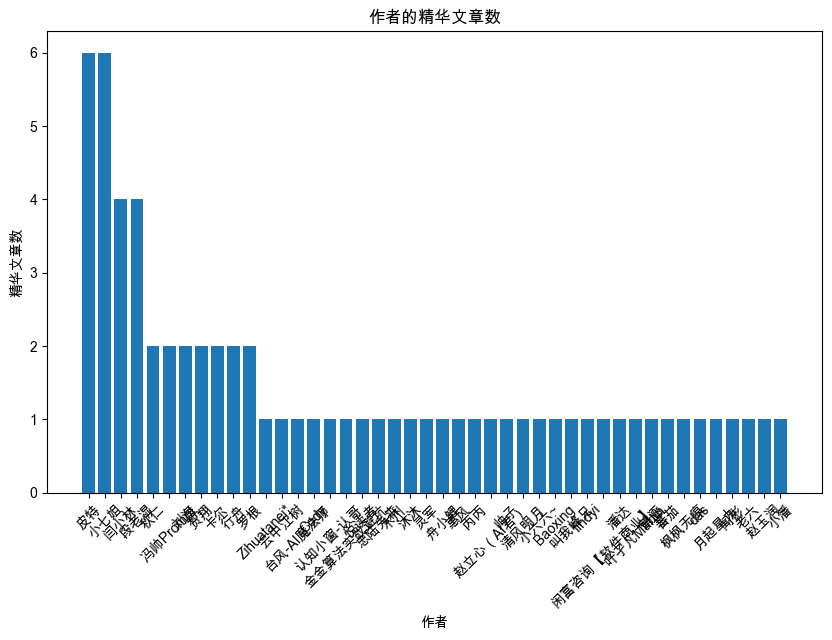

In [168]:

# 统计每位作者的文章数
author_article_counts = df['owner'].value_counts().reset_index()
author_article_counts.columns = ['author', 'article_count']

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(author_article_counts['author'], author_article_counts['article_count'])
plt.xlabel('作者')
plt.ylabel('精华文章数')
plt.title('作者的精华文章数')
plt.xticks(rotation=45)  # 旋转 X 轴标签，使其更易读
plt.show()

大腿来自哪里

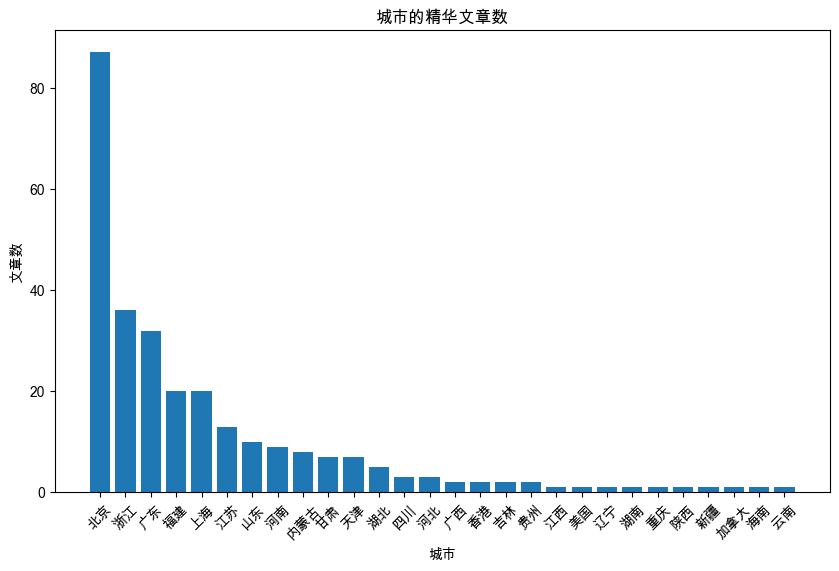

In [187]:
# 覆盖了多少个城市
# 统计每位作者的文章数
metrics = df['location'].value_counts().reset_index()
metrics.columns = ['X', 'Y']

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(metrics['X'], metrics['Y'])
plt.xlabel('城市')
plt.ylabel('文章数')
plt.title('城市的精华文章数')
plt.xticks(rotation=45)  # 旋转 X 轴标签，使其更易读
plt.show()

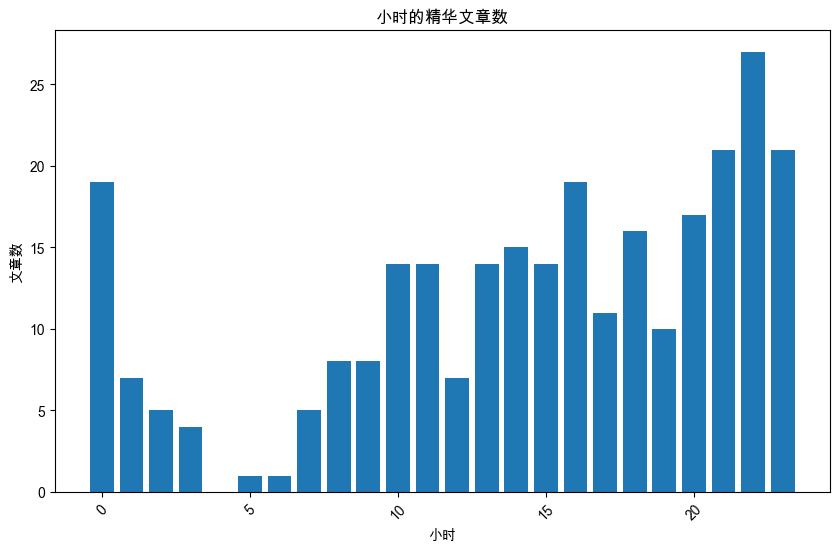

In [189]:

# 统计每位作者的文章数
metrics = df['hour'].value_counts().reset_index()
metrics.columns = ['X', 'Y']

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(metrics['X'], metrics['Y'])
plt.xlabel('小时')
plt.ylabel('文章数')
plt.title('小时的精华文章数')
plt.xticks(rotation=45)  # 旋转 X 轴标签，使其更易读
plt.show()

阅读数最多的10个标题

In [194]:
df_sorted = df.sort_values(by="readers_count", ascending=False)
top_10 = df_sorted.head(10)
top_10[['title', 'owner', 'readers_count', 'article_url']]

,title,owner,readers_count,article_url
241,0代码基础小白使用ChatGPT做出一款谷歌全屏截图插件的全过程,阿强,20783,https://articles.zsxq.com/inline_form/id_grll0...
242,最近见了不少大佬和创业者，对AI能改变的行业和能做的方向有了一些新的认知，当然我不会谈大模型...,findyi,20056,
238,如何利用 ChatGPT 辅助写作,闫小林,18195,https://articles.zsxq.com/inline_form/id_9xwa8...
240,刚才一个来自日语小语种文科生的提问，问题是文科生能不能学会AI之类，我回答了半天，结果发送的...,findyi,17937,
239,如何用ChatGPT， 每天自动批量产出100+条爆款短视频,🍀刘驴💥,15976,https://articles.zsxq.com/inline_form/id_e74ag...
244,我们马上1.6万会员了，这个增长速度也超过了我的预期，压力山大、责任深重，我尽全力用心服务好...,findyi,15026,
274,使用AI，做抖音漫画短视频，4个人2天的工作量，1人仅需5小时即可完成！,蛋解创业蛋蛋,14583,https://articles.zsxq.com/inline_form/id_4kdt0...
243,再见，网易！\n\n这三年收获巨大，操盘了年收入10个亿的业务，团队获得了网易有道各种奖励，...,findyi,14452,
235,如何用好ChatGPT，10倍提升输出效果🎉\n\n大家好，我是潘达。\n\n之前直播连麦洋...,潘达,14432,
249,"<e type=""hashtag"" hid=""28885111111551"" title=""...",鱼皮,14244,


点赞数最多的10个标题

In [196]:
df_sorted = df.sort_values(by="likes_count", ascending=False)
top_10 = df_sorted.head(10)
top_10[['title', 'owner', 'likes_count', 'article_url']]

,title,owner,likes_count,article_url
266,失眠了，聊几件本来准备早上说的事儿：\n\n1.我们的AI星球最多再过1-2个月就会开启AI...,findyi,904,
238,如何利用 ChatGPT 辅助写作,闫小林,523,https://articles.zsxq.com/inline_form/id_9xwa8...
235,如何用好ChatGPT，10倍提升输出效果🎉\n\n大家好，我是潘达。\n\n之前直播连麦洋...,潘达,513,
196,重磅通知：AI大航海下周正式开始报名！\n\n第一期AI大航海有两个方向：\n\n1.Cha...,findyi,497,
180,我来兑现团队给大家的承诺了，第一期航海报名结束后，有很多圈友都很着急，怕被落下，所以我们团队...,findyi,471,
190,爆肝10天，超级详细进阶SD教程 ! ！！\n大家好我是浦睿，一名大二在校生；SD绘画热爱者...,无忆,450,
232,接上一条，讲讲我的超级个体打造之路，AI时代一定是超级个体的时代：\n\n首先定义下什么是超...,findyi,440,
241,0代码基础小白使用ChatGPT做出一款谷歌全屏截图插件的全过程,阿强,433,https://articles.zsxq.com/inline_form/id_grll0...
245,我做的AI律所：不仅律师自发传播，竟然还吸引了大佬王小川？,台风-2号,415,https://articles.zsxq.com/inline_form/id_oug13...
244,我们马上1.6万会员了，这个增长速度也超过了我的预期，压力山大、责任深重，我尽全力用心服务好...,findyi,414,


In [4]:
import jieba

# 给定的标题
title = "如何用好ChatGPT，10倍提升输出效果🎉\n\n大家好，我是潘达。\n\n之前直播连麦洋."

# 使用jieba分词来提取关键字
keywords = jieba.cut(title)

# 将关键字列表转换为字符串
keywords_str = " ".join(keywords)

# 打印提取的关键字
print(111, keywords_str)


111 如何 用 好 ChatGPT ， 10 倍 提升 输出 效果 🎉 
 
 大家 好 ， 我 是 潘达 。 
 
 之前 直播 连麦洋 .


标题关键词词云分析

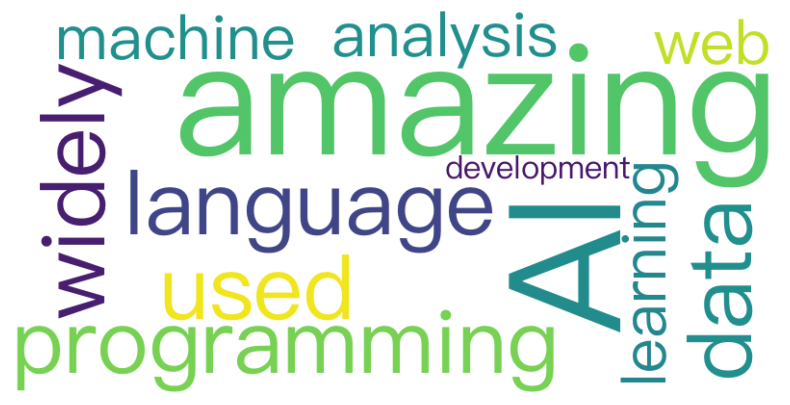

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 设置中文字体，'SimHei'是宋体字体的一种，根据需要选择合适的字体
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'

# 用于正常显示负号
plt.rcParams['axes.unicode_minus'] = False

# 准备文本数据
text = "AI  an amazing programming language. It is widely used for data analysis, machine learning, web development, and more."
text = "AI 编程 编程 编程 编程 编程 编程 编程 编程 提示词"
# 创建词云对象并生成词云图像
font_path = "/System/Library/fonts/PingFang.ttc"
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# 显示词云图像
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 隐藏坐标轴
plt.show()